# Activation analysis
In which contrast is the difference between two conditions. In our study, we only analyzed the contrast between neutral and threat conditions.

In [8]:
import os
os.chdir('/project/3013104.01')
os.getcwd()

'/project/3013104.01'

## Calculate average difference between conditions per contrast

In [15]:
import os
import pandas as pd
import numpy as np

data_dir = 'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated'
out_dir = 'analysis/activation/difference'

# Define condition contrasts using a dictionary
condition_contrasts = {
    'contrast_1': ('none', 'neutral'),
    'contrast_2': ('none', 'threat'),
    'contrast_3': ('neutral', 'threat')
}

for contrast_name, (condition_1, condition_2) in condition_contrasts.items():
    subject_files = sorted([file for file in os.listdir(f'{data_dir}/{condition_1}') if file.endswith('concat.csv')])
    #subject_files = ['subject-0008_z_concat.csv']
    for subject_file in subject_files:
        # Extract subject ID
        subject_id = subject_file.split('_')[0]

        # Load CSV files
        condition_1_file = f'{data_dir}/{condition_1}/{subject_id}_z_concat.csv'
        condition_2_file = f'{data_dir}/{condition_2}/{subject_id}_z_concat.csv'

        condition_1_df = pd.read_csv(condition_1_file, header=0, index_col=None, usecols=lambda col: col.lower() != 'volume')
        condition_2_df = pd.read_csv(condition_2_file, header=0, index_col=None, usecols=lambda col: col.lower() != 'volume')

        # Set the same column names for both
        condition_2_df.columns = condition_1_df.columns

        # Create output directory if not exists
        output_dir = f'{out_dir}/{condition_2}_{condition_1}'
        os.makedirs(output_dir, exist_ok=True)

        # Create a DataFrame to store average difference results for each node
        avg_diff_df = pd.DataFrame(index=range(300), columns=['node', 'average_difference'])

        for node in range(300):
            # Extract the 'node' column from both DataFrames using iloc
            condition_1_node_column = condition_1_df.iloc[:, node].dropna().reset_index(drop=True)
            condition_2_node_column = condition_2_df.iloc[:, node].dropna().reset_index(drop=True)

            # Combine the two columns based on the index and handle missing values
            combined_data = pd.concat([condition_1_node_column, condition_2_node_column], axis=1)
            combined_data.columns = [condition_1, condition_2]
            combined_data = combined_data.dropna(subset=[condition_1, condition_2])

            if len(combined_data) == 0:
                # Handle case where there are no samples left
                avg_diff_df.at[node, 'node'] = node
                avg_diff_df.at[node, 'average_difference'] = np.nan
                continue

            # Calculate the average difference
            average_difference = np.mean(condition_2_node_column - condition_1_node_column)

            # Store the result in the DataFrame
            avg_diff_df.at[node, 'node'] = node
            avg_diff_df.at[node, 'average_difference'] = average_difference

        print(f"Completed: {subject_id} - {contrast_name}")

        # Save the average difference results DataFrame to a CSV file
        output_file = f'{output_dir}/{subject_id}_avg_diff.csv'
        avg_diff_df.to_csv(output_file, index=False)


Completed: subject-0001 - contrast_1
Completed: subject-0003 - contrast_1
Completed: subject-0004 - contrast_1
Completed: subject-0005 - contrast_1
Completed: subject-0006 - contrast_1
Completed: subject-0007 - contrast_1
Completed: subject-0008 - contrast_1
Completed: subject-0009 - contrast_1
Completed: subject-0010 - contrast_1
Completed: subject-0011 - contrast_1
Completed: subject-0012 - contrast_1
Completed: subject-0013 - contrast_1
Completed: subject-0014 - contrast_1
Completed: subject-0015 - contrast_1
Completed: subject-0016 - contrast_1
Completed: subject-0017 - contrast_1
Completed: subject-0018 - contrast_1
Completed: subject-0019 - contrast_1
Completed: subject-0020 - contrast_1
Completed: subject-0021 - contrast_1
Completed: subject-0022 - contrast_1
Completed: subject-0023 - contrast_1
Completed: subject-0024 - contrast_1
Completed: subject-0025 - contrast_1
Completed: subject-0026 - contrast_1
Completed: subject-0027 - contrast_1
Completed: subject-0028 - contrast_1
C

Completed: subject-0224 - contrast_1
Completed: subject-0225 - contrast_1
Completed: subject-0226 - contrast_1
Completed: subject-0227 - contrast_1
Completed: subject-0228 - contrast_1
Completed: subject-0229 - contrast_1
Completed: subject-0230 - contrast_1
Completed: subject-0231 - contrast_1
Completed: subject-0232 - contrast_1
Completed: subject-0233 - contrast_1
Completed: subject-0234 - contrast_1
Completed: subject-0235 - contrast_1
Completed: subject-0236 - contrast_1
Completed: subject-0237 - contrast_1
Completed: subject-0238 - contrast_1
Completed: subject-0239 - contrast_1
Completed: subject-0001 - contrast_2
Completed: subject-0003 - contrast_2
Completed: subject-0004 - contrast_2
Completed: subject-0005 - contrast_2
Completed: subject-0006 - contrast_2
Completed: subject-0007 - contrast_2
Completed: subject-0008 - contrast_2
Completed: subject-0009 - contrast_2
Completed: subject-0010 - contrast_2
Completed: subject-0011 - contrast_2
Completed: subject-0012 - contrast_2
C

Completed: subject-0208 - contrast_2
Completed: subject-0209 - contrast_2
Completed: subject-0210 - contrast_2
Completed: subject-0211 - contrast_2
Completed: subject-0212 - contrast_2
Completed: subject-0213 - contrast_2
Completed: subject-0214 - contrast_2
Completed: subject-0215 - contrast_2
Completed: subject-0216 - contrast_2
Completed: subject-0217 - contrast_2
Completed: subject-0218 - contrast_2
Completed: subject-0219 - contrast_2
Completed: subject-0220 - contrast_2
Completed: subject-0221 - contrast_2
Completed: subject-0222 - contrast_2
Completed: subject-0223 - contrast_2
Completed: subject-0224 - contrast_2
Completed: subject-0225 - contrast_2
Completed: subject-0226 - contrast_2
Completed: subject-0227 - contrast_2
Completed: subject-0228 - contrast_2
Completed: subject-0229 - contrast_2
Completed: subject-0230 - contrast_2
Completed: subject-0231 - contrast_2
Completed: subject-0232 - contrast_2
Completed: subject-0233 - contrast_2
Completed: subject-0234 - contrast_2
C

Completed: subject-0192 - contrast_3
Completed: subject-0193 - contrast_3
Completed: subject-0194 - contrast_3
Completed: subject-0195 - contrast_3
Completed: subject-0196 - contrast_3
Completed: subject-0197 - contrast_3
Completed: subject-0198 - contrast_3
Completed: subject-0199 - contrast_3
Completed: subject-0200 - contrast_3
Completed: subject-0201 - contrast_3
Completed: subject-0202 - contrast_3
Completed: subject-0203 - contrast_3
Completed: subject-0204 - contrast_3
Completed: subject-0205 - contrast_3
Completed: subject-0206 - contrast_3
Completed: subject-0207 - contrast_3
Completed: subject-0208 - contrast_3
Completed: subject-0209 - contrast_3
Completed: subject-0210 - contrast_3
Completed: subject-0211 - contrast_3
Completed: subject-0212 - contrast_3
Completed: subject-0213 - contrast_3
Completed: subject-0214 - contrast_3
Completed: subject-0215 - contrast_3
Completed: subject-0216 - contrast_3
Completed: subject-0217 - contrast_3
Completed: subject-0218 - contrast_3
C

## Re-format

In [16]:
import os
import pandas as pd

contrasts = ['neutral_none', 'threat_neutral', 'threat_none']

# Concatenate across subjects
for contrast in contrasts:
    data_dir = f'analysis/activation/difference/{contrast}'
    
    # Get a list of all .csv files in the data directory
    csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]
    
    # Initialize an empty list to store individual DataFrames
    data_frames = []
    
    # Iterate through each .csv file and read it into a DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(data_dir, csv_file)
        df = pd.read_csv(file_path)
        
        # Get the first part of the file name (everything before the first '_')
        column_name = os.path.splitext(csv_file)[0].split('_')[0]
        
        # Keep only the 't_statistic' column and rename it
        df = df[['node', 'average_difference']].rename(columns={'average_difference': column_name})
        
        data_frames.append(df)
    
    # Concatenate all DataFrames horizontally on the 'node' column
    concatenated_df = pd.concat(data_frames, axis=1)
    
    # Drop duplicate 'node' columns (keeping only the first one)
    concatenated_df = concatenated_df.loc[:, ~concatenated_df.columns.duplicated()]
    
    # Save the concatenated DataFrame to a new .csv file
    output_file = f'analysis/activation/difference/{contrast}.csv'
    concatenated_df.to_csv(output_file, index=False)

    print(f"Processed and saved: {output_file}")

# Transpose
directory_path = 'analysis/activation/difference'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Iterate through each CSV file and transpose it
for file_name in csv_files:
    file_path = os.path.join(directory_path, file_name)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, header=0, index_col=0)

    # Transpose the DataFrame
    df_transposed = df.transpose()

    # Reset the index to make the current index a regular column
    df_transposed.reset_index(inplace=True)

    # Rename the first column to 'subject'
    df_transposed.rename(columns={df_transposed.columns[0]: 'subject'}, inplace=True)

    # Organize the rows according to 'subject' column
    df_transposed.sort_values(by='subject', inplace=True)
    
    # Fill blanks with 'NA'
    df_transposed.fillna('NA', inplace=True)

    # Save the transposed DataFrame back to a CSV file
    transposed_file_name = f"transposed_{file_name}"
    transposed_file_path = os.path.join(directory_path, transposed_file_name)
    df_transposed.to_csv(transposed_file_path, index=False)

    print(f"Transposed and saved: {transposed_file_path}")


Processed and saved: analysis/activation/difference/neutral_none.csv
Processed and saved: analysis/activation/difference/threat_neutral.csv
Processed and saved: analysis/activation/difference/threat_none.csv
Transposed and saved: analysis/activation/difference/transposed_neutral_none.csv
Transposed and saved: analysis/activation/difference/transposed_threat_neutral.csv
Transposed and saved: analysis/activation/difference/transposed_threat_none.csv


## Average differences across ROIs in the same a priori network

In [21]:
import pandas as pd
import numpy as np

network_info = pd.read_csv('analysis/atlas_schaefer/label_network.csv')
data_dir = 'analysis/activation/difference'
contrasts = ['neutral_none', 'threat_neutral', 'threat_none']
networks = ['control', 'default', 'salience_ventral_attention']

for contrast in contrasts:
    correlation_file = f'{data_dir}/transposed_{contrast}.csv'
    out_file = f'{data_dir}/transposed_{contrast}_network.csv'
    
    # Read correlation file
    correlation_data = pd.read_csv(correlation_file, index_col=0, header=0)
    
    # Initialize an empty DataFrame to store network averages
    network_averages = pd.DataFrame(index=correlation_data.index)
    
    for network in networks:
        # Find nodes belonging to the current network
        network_nodes = network_info.loc[network_info['network'] == network, 'node'].astype(str).values
        
        # Calculate average across columns (nodes) in the same network
        network_average = correlation_data[network_nodes].mean(axis=1, skipna=True)
        
        # Store the network average in the DataFrame
        network_averages[network] = network_average
    
    # Save the network averages to a new CSV file
    network_averages.to_csv(out_file)

### Plot histogram of differences per contrast per network

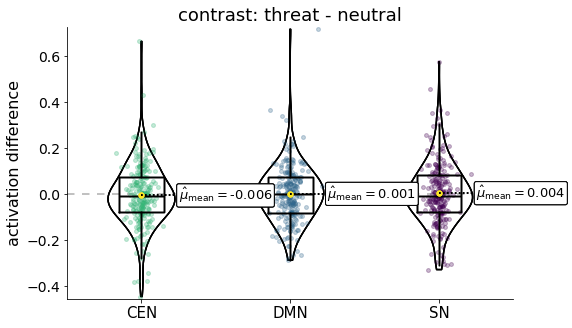

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib.cm import viridis

# Define contrasts and columns_to_plot
contrasts = ['threat_neutral']
columns_to_plot = ['control', 'default', 'salience_ventral_attention']

# Initialize variables to store overall min and max values
overall_min = float('inf')
overall_max = float('-inf')

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#000000"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#000000"
GREY_DARK = "#747473"
YELLOW = "#fde725"

# Set colors for scatterplots
COLOR_SCALE = ["#35b779", "#31688e", "#440154"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2]

# Horizontal lines
HLINES = [0.0]


# Initialize a single figure and axes for all plots
fig, axs = plt.subplots(len(contrasts), 1, figsize=(8, 5 * len(contrasts)), sharey=True)

# Ensure axs is a list even if there's only one subplot
if not isinstance(axs, np.ndarray):
    axs = [axs]

# Define colormap
cmap = viridis


# Horizontal lines that are used as scale reference
for h in HLINES:
    for ax in axs:  # Iterate over all subplots
        ax.axhline(h, color='#999999', ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Loop through contrasts
for row, contrast in enumerate(contrasts):
    # Load the CSV file into a DataFrame
    file_path = f'analysis/activation/difference/transposed_{contrast}_network.csv'
    df = pd.read_csv(file_path)

    # Melt the DataFrame to combine columns_to_plot into one 'network' column
    melted_df = pd.melt(df, value_vars=columns_to_plot, var_name='network', value_name='activation difference')
    
    # Get the networks, sorted alphabetically
    networks = sorted(melted_df["network"].unique())

    # y_data is a list of length 3 containing the activation difference values for each network
    y_data = [melted_df[melted_df["network"] == network]["activation difference"].values for network in networks]

    # Create jittered version of "x" (which is only 0, 1, and 2)
    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
    
    # Calculate offset for x-values to spread out the scatter points
    offset = 0.2 * (row - (len(contrasts) - 1) / 2)  # Adjust multiplier as needed
    
    # Plot 
    for col, network in enumerate(networks):
        # Violins
        violins = axs[row].violinplot(
            y_data, 
            positions=POSITIONS, 
            widths=0.45, 
            bw_method="silverman", 
            showmeans=False, 
            showmedians=False, 
            showextrema=False)

        # Customize violins
        for pc in violins['bodies']:
            pc.set_facecolor('none')
            pc.set_edgecolor('#000000')
            pc.set_linewidth(1.4)
            pc.set_alpha(1)

        # Boxplots
        medianprops = dict(
            linewidth=1.4, 
            color='#000000',
            solid_capstyle="butt")
        boxprops = dict(
            linewidth=1.4, 
            color='#000000')
        axs[row].boxplot(
            y_data,
            positions=POSITIONS, 
            showfliers = False, # Do not show the outliers beyond the caps.
            showcaps = False,   # Do not show the caps
            medianprops = medianprops,
            whiskerprops = boxprops,
            boxprops = boxprops)

        # Jittered dots
        for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
            axs[row].scatter(x, y, s = 15, color=color, alpha=0.1)

        # Mean value labels 
        means = [y.mean() for y in y_data]
        for i, mean in enumerate(means):
            # Add dot representing the mean
            axs[row].scatter(i, mean, s=25, color=YELLOW, zorder=3)

            # Add line connecting mean value and its label
            axs[row].plot([i, i + 0.25], [mean, mean], ls="dotted", color="#000000", zorder=3)

            # Add mean value label
            axs[row].text(
                i + 0.25,
                mean,
                r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 3)),
                fontsize=13,
                va="center",
                bbox=dict(
                    facecolor="#ffffff",
                    edgecolor="#000000",
                    boxstyle="round",
                    pad=0.15
                ),
                zorder=10)  # to make sure the line is on top

    # Set title for the subplot based on contrast
    custom_title = f'contrast: {contrast.replace("_", " - ").replace("none", "baseline")}'
    axs[row].set_title(custom_title, fontsize=18)

    # Add labels and legend to each row
    axs[row].set_ylabel('activation difference', fontsize=16)
    
    # Remove box around the plot
    axs[row].spines['top'].set_visible(False)
    axs[row].spines['right'].set_visible(False)
    
    # Increase tick font size
    axs[row].tick_params(axis='both', which='major', labelsize=14)
    
    # Customize x-axis
    xlabels = [f"{network.replace('salience_ventral_attention', 'SN').replace('control','CEN').replace('default','DMN')}" for network in networks]
    axs[row].set_xticks(POSITIONS)
    axs[row].set_xticklabels(xlabels, size=15, ha="center", ma="center")

    # Update overall min and max values
    overall_min = min(overall_min, melted_df['activation difference'].min()) - 0.01
    overall_max = max(overall_max, melted_df['activation difference'].max()) + 0.01

# Set the same y-axis limits for all subplots
for ax in axs:
    ax.set_ylim(overall_min, overall_max)

# Adjust layout to add more space between the subplots
plt.subplots_adjust(hspace=0.3)

# Save the figure
plt.savefig('analysis/plots/activation_contrast_violins.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [40]:
import pandas as pd

# Define contrasts and columns_to_plot
contrasts = ['neutral_none', 'threat_neutral', 'threat_none']
columns_to_plot = ['control', 'default', 'salience_ventral_attention']

for contrast in contrasts:
    # Load the CSV file into a DataFrame
    file_path = f'analysis/activation/difference/transposed_{contrast}_network.csv'
    df = pd.read_csv(file_path)

    # Melt the DataFrame to combine columns_to_plot into one 'network' column
    melted_df = pd.melt(df, value_vars=columns_to_plot, var_name='network', value_name='activation difference')

    # Check if the melted DataFrame has any data
    if melted_df.empty:
        print(f"No data in melted DataFrame for contrast: {contrast}")
    else:
        print(melted_df.head())  # For verification or further processing


   network  activation difference
0  control               0.018465
1  control              -0.029400
2  control              -0.488191
3  control              -0.420829
4  control              -0.201879
   network  activation difference
0  control              -0.053542
1  control              -0.014478
2  control               0.126056
3  control               0.180645
4  control               0.145829
   network  activation difference
0  control              -0.009241
1  control              -0.132465
2  control              -0.300009
3  control              -0.371400
4  control               0.008578


## Correlate contrast differences per network with SPS dimension score

In [22]:
import os
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, t

data_dir = 'analysis/activation/difference'
out_dir = f'{data_dir}/diff_corr_spsq'
spsq_file = 'analysis/SPSQ-24_all.csv'

contrasts = ['neutral_none', 'threat_neutral', 'threat_none']
networks = ['control', 'default', 'salience_ventral_attention']
dimensions = ['SPSQ_pos', 'SPSQ_neg']

os.makedirs(out_dir, exist_ok=True)

# Initialize an empty DataFrame to store all results
all_results = pd.DataFrame(columns=['contrast', 'network', 'dimension', 'pearson_r', 'p_raw', 'ci', 'se'])

for contrast in contrasts:
    for network in networks:
        for dimension in dimensions:
            difference = pd.read_csv(f'{data_dir}/transposed_{contrast}_network.csv', header=0)
            spsq_scores = pd.read_csv(spsq_file, header=0)
            
            # Assuming difference and spsq_scores have columns 'network' and 'dimension' respectively
            # Modify the column names accordingly if they are different
            correlation, p_value = pearsonr(difference[network], spsq_scores[dimension])
            
            # Calculate standard error
            se = 1 / np.sqrt(len(difference) - 3)
            
            # Calculate critical value from t-distribution
            degrees_of_freedom = len(difference) - 2
            t_critical = t.ppf(0.975, df=degrees_of_freedom)
            
            # Calculate margin of error and confidence interval
            margin_error = t_critical * se
            ci_low, ci_high = correlation - margin_error, correlation + margin_error
            
            # Append the result to the DataFrame
            result_df = pd.DataFrame({
                'contrast': [contrast],
                'network': [network],
                'dimension': [dimension],
                'pearson_r': [correlation],
                'p_raw': [p_value],
                'ci': [(ci_low, ci_high)],
                'se': [se]
            })
            all_results = pd.concat([all_results, result_df], ignore_index=True)
            print(f"Completed: {contrast}_{network}_{dimension}")

# Save the concatenated results to a single CSV file
all_results.to_csv(f'{out_dir}/all_results.csv', index=False)
print("All results saved to all_results.csv")

Completed: neutral_none_control_SPSQ_pos
Completed: neutral_none_control_SPSQ_neg
Completed: neutral_none_default_SPSQ_pos
Completed: neutral_none_default_SPSQ_neg
Completed: neutral_none_salience_ventral_attention_SPSQ_pos
Completed: neutral_none_salience_ventral_attention_SPSQ_neg
Completed: threat_neutral_control_SPSQ_pos
Completed: threat_neutral_control_SPSQ_neg
Completed: threat_neutral_default_SPSQ_pos
Completed: threat_neutral_default_SPSQ_neg
Completed: threat_neutral_salience_ventral_attention_SPSQ_pos
Completed: threat_neutral_salience_ventral_attention_SPSQ_neg
Completed: threat_none_control_SPSQ_pos
Completed: threat_none_control_SPSQ_neg
Completed: threat_none_default_SPSQ_pos
Completed: threat_none_default_SPSQ_neg
Completed: threat_none_salience_ventral_attention_SPSQ_pos
Completed: threat_none_salience_ventral_attention_SPSQ_neg
All results saved to all_results.csv


# Plot the average activation per network in each condition

## Calculate mean activation for each ROI across subjects

In [10]:
import os
import pandas as pd
import numpy as np

conditions = ['none', 'neutral', 'threat']

for condition in conditions:
    data_dir = f'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/{condition}'
    out_dir = f'analysis/activation/mean_activation/{condition}'

    # Create out_dir if it doesn't exist
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # List all CSV files in data_dir
    csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]

    # Check if there are any CSV files
    if not csv_files:
        print(f"No CSV files found in the specified directory for condition {condition}.")
    else:
        # Initialize an empty list to store DataFrames for each subject
        subject_dfs = []

        # Iterate through each CSV file
        for csv_file in csv_files:
            file_path = os.path.join(data_dir, csv_file)

            # Read the CSV file into a DataFrame
            subject_df = pd.read_csv(file_path, header=0, index_col=None, usecols=lambda col: col.lower() != 'volume')

            # Fill missing values with NA up to 150 rows
            subject_df = subject_df.reindex(range(150), fill_value=np.nan)

            # Print the dimensions of the current CSV file
            #print(f"Dimensions of {csv_file}: {subject_df.shape}")

            # Append the DataFrame to the list after ensuring it has the same number of columns
            subject_dfs.append(subject_df.values)

        # Stack DataFrames along the first dimension (axis=0)
        concatenated_cube = np.stack(subject_dfs, axis=0)

        # Calculate the mean cube across all subjects (axis=0) or time(axis=1), ignoring NA values
        mean_cube = np.nanmean(concatenated_cube, axis=1)

        # Create a DataFrame for the mean matrix
        mean_df = pd.DataFrame(mean_cube, columns=subject_df.columns)

        # Save the mean DataFrame to a CSV file in out_dir
        mean_df.to_csv(os.path.join(out_dir, 'mean_activation_roi.csv'), index=False)

        print(f"Mean activation matrix calculated and saved successfully for condition {condition}.")

Mean activation matrix calculated and saved successfully for condition none.
Mean activation matrix calculated and saved successfully for condition neutral.
Mean activation matrix calculated and saved successfully for condition threat.


## Average across ROIS in each network

In [12]:
import pandas as pd
import numpy as np

network_info = pd.read_csv('analysis/atlas_schaefer/label_network.csv', header=0)
conditions = ['none', 'neutral', 'threat']
networks = ['control', 'default', 'salience_ventral_attention']

for condition in conditions:
    data_dir = f'analysis/activation/mean_activation/{condition}'
    out_file = f'{data_dir}/mean_activation_network.csv'
    
    # Read mean activation file
    roi_data = pd.read_csv(f'{data_dir}/mean_activation_roi.csv', index_col=None, header=0)

    # Extract node values from network_info
    node_values = network_info['node'].astype(str).values

    # Set node values as column names in roi_data
    roi_data.columns = node_values

    # Initialize an empty DataFrame to store network averages
    network_averages = pd.DataFrame(index=roi_data.index)
    
    # Iterate over networks
    for network in networks:
        # Find nodes belonging to the current network
        network_nodes = network_info.loc[network_info['network'] == network, 'node'].astype(str).values

        # Calculate average across columns (nodes) in the same network
        network_average = roi_data[network_nodes].mean(axis=1, skipna=True)

        # Store the network average in the DataFrame
        network_averages[network] = network_average
    
    # Save the network averages to a new CSV file
    network_averages.to_csv(out_file)


## Plot

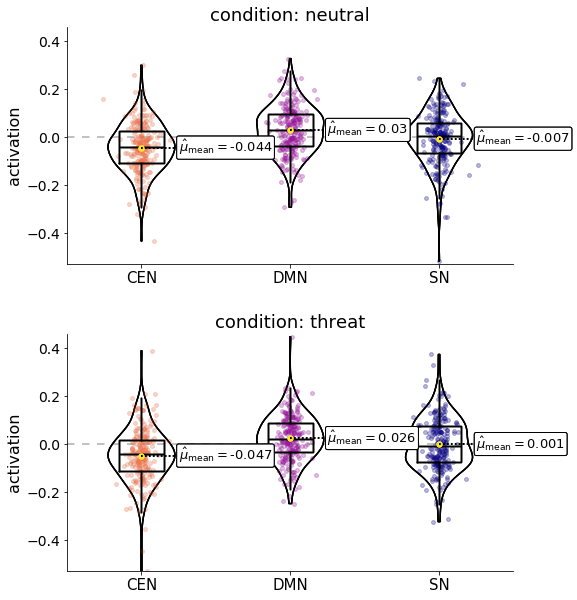

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib.cm import viridis

# Define contrasts and columns_to_plot
contrasts = ['neutral', 'threat'] # conditions
columns_to_plot = ['control', 'default', 'salience_ventral_attention']

# Initialize variables to store overall min and max values
overall_min = float('inf')
overall_max = float('-inf')

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#000000"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#000000"
GREY_DARK = "#747473"
MEAN_DOT = "#fde725"

# Set colors for scatterplots
COLOR_SCALE = ["#ed7953", "#9c179e", "#0d0887"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2]

# Horizontal lines
HLINES = [0.0]

# Initialize a single figure and axes for all plots
fig, axs = plt.subplots(len(contrasts), 1, figsize=(8, 5 * len(contrasts)), sharey=True)

# Define colormap
cmap = viridis

# Horizontal lines that are used as scale reference
for h in HLINES:
    for ax in axs:  # Iterate over all subplots
        ax.axhline(h, color='#999999', ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Loop through contrasts
for row, contrast in enumerate(contrasts):
    # Load the CSV file into a DataFrame
    file_path = f'analysis/activation/mean_activation/{contrast}/mean_activation_network.csv'
    df = pd.read_csv(file_path)

    # Melt the DataFrame to combine columns_to_plot into one 'network' column
    melted_df = pd.melt(df, value_vars=columns_to_plot, var_name='network', value_name='activation difference')
    
    # Get the networks, sorted alphabetically
    networks = sorted(melted_df["network"].unique())

    # y_data is a list of length 3 containing the activation difference values for each network
    y_data = [melted_df[melted_df["network"] == network]["activation difference"].values for network in networks]

    # Create jittered version of "x" (which is only 0, 1, and 2)
    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
    
    # Calculate offset for x-values to spread out the scatter points
    offset = 0.2 * (row - (len(contrasts) - 1) / 2)  # Adjust multiplier as needed
    
    # Plot 
    for col, network in enumerate(networks):
        # Violins
        violins = axs[row].violinplot(
            y_data, 
            positions=POSITIONS, 
            widths=0.45, 
            bw_method="silverman", 
            showmeans=False, 
            showmedians=False, 
            showextrema=False)

        # Customize violins
        for pc in violins['bodies']:
            pc.set_facecolor('none')
            pc.set_edgecolor(BLACK)
            pc.set_linewidth(1.4)
            pc.set_alpha(1)

        # Boxplots
        medianprops = dict(
            linewidth=1.4, 
            color='#000000',
            solid_capstyle="butt")
        boxprops = dict(
            linewidth=1.4, 
            color='#000000')
        axs[row].boxplot(
            y_data,
            positions=POSITIONS, 
            showfliers = False, # Do not show the outliers beyond the caps.
            showcaps = False,   # Do not show the caps
            medianprops = medianprops,
            whiskerprops = boxprops,
            boxprops = boxprops)

        # Jittered dots
        for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
            axs[row].scatter(x, y, s = 15, color=color, alpha=0.1)

        # Mean value labels 
        means = [y.mean() for y in y_data]
        for i, mean in enumerate(means):
            # Add dot representing the mean
            axs[row].scatter(i, mean, s=25, color=MEAN_DOT, zorder=3)

            # Add line connecting mean value and its label
            axs[row].plot([i, i + 0.25], [mean, mean], ls="dotted", color="black", zorder=3)

            # Add mean value label
            axs[row].text(
                i + 0.25,
                mean,
                r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 3)),
                fontsize=13,
                va="center",
                bbox=dict(
                    facecolor="white",
                    edgecolor="black",
                    boxstyle="round",
                    pad=0.15
                ),
                zorder=10)  # to make sure the line is on top

    # Set title for the subplot based on contrast
    custom_title = f'condition: {contrast.replace("_", "-").replace("none", "baseline")}'
    axs[row].set_title(custom_title, fontsize=18)

    # Add labels and legend to each row
    axs[row].set_ylabel('activation', fontsize=16)
    
    # Remove box around the plot
    axs[row].spines['top'].set_visible(False)
    axs[row].spines['right'].set_visible(False)
    # Increase tick font size
    axs[row].tick_params(axis='both', which='major', labelsize=14)
    
    # Customize x-axis
    xlabels = [f"{network.replace('salience_ventral_attention', 'SN').replace('control','CEN').replace('default','DMN')}" for network in networks]
    axs[row].set_xticks(POSITIONS)
    axs[row].set_xticklabels(xlabels, size=15, ha="center", ma="center")
    #axs[row].set_xlabel("network", size=18)

    # Update overall min and max values
    overall_min = min(overall_min, melted_df['activation difference'].min())
    overall_max = max(overall_max, melted_df['activation difference'].max()) + 0.01

# Set the same y-axis limits for all subplots
for ax in axs:
    ax.set_ylim(overall_min, overall_max)

# Adjust layout to add more space between the subplots
plt.subplots_adjust(hspace=0.3)

# Save the figure
plt.savefig('analysis/plots/activation_violins.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()